파이토치에서는 nn.RNN()을 통해서 RNN 셀을 구현합니다. 실습을 통해 이해해봅시다. 우선 필요한 파이토치의 도구들을 임포트합니다.

In [2]:
import torch
import torch.nn as nn

print("PyTorch version: {}".format(torch.__version__))
print("CUDA version: {}".format(torch.version.cuda))
print(torch.cuda.get_device_name(0))

PyTorch version: 1.9.1+cpu
CUDA version: None


AssertionError: Torch not compiled with CUDA enabled

이제 입력의 크기와 은닉 상태의 크기를 정의합니다. 은닉 상태의 크기는 대표적인 RNN의 하이퍼파라미터입니다. 여기서 입력의 크기는 매 시점마다 들어가는 입력의 크기를 의미합니다.

In [2]:
input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

이제 입력 텐서를 정의합니다. 입력 텐서는 (배치 크기 × 시점의 수 × 매 시점마다 들어가는 입력)의 크기를 가집니다. 여기서는 배치 크기는 1, 10번의 시점동안 5차원의 입력 벡터가 들어가도록 텐서를 정의합니다.

In [3]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

이제 nn.RNN()을 사용하여 RNN의 셀을 만듭니다. 인자로 입력의 크기, 은닉 상태의 크기를 정의해주고, batch_first=True를 통해서 입력 텐서의 첫번째 차원이 배치 크기임을 알려줍니다.

In [4]:
cell = nn.RNN(input_size, hidden_size, batch_first=True)

입력 텐서를 RNN 셀에 입력하여 출력을 확인해봅시다.

In [5]:
outputs, _status = cell(inputs)

RNN 셀은 두 개의 입력을 리턴하는데, 첫번째 리턴값은 모든 시점(timesteps)의 은닉 상태들이며, 두번째 리턴값은 마지막 시점(timestep)의 은닉 상태입니다. 우선 첫번째 리턴값에 대해서 크기를 확인해봅시다.

In [6]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


첫번째 리턴값의 은닉 상태들은 (1, 10, 8)의 크기를 가집니다. 이는 10번의 시점동안 8차원의 은닉상태가 출력되었다는 의미입니다. 두번째 리턴값. 다시 말해 마지막 시점의 은닉 상태의 크기를 확인해보겠습니다.

In [7]:
print(_status.shape) # 최종 time-step의 hidden_state

torch.Size([1, 1, 8])


 # 깊은 순환 신경망(Deep Recurrent Neural Network)

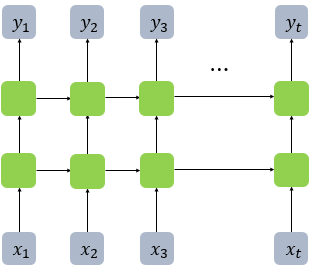

In [10]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True)
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


In [11]:
print(_status.shape) # (층의 개수, 배치 크기, 은닉 상태의 크기)

torch.Size([1, 1, 8])
